In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display_html, display, Math, HTML
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted;

# Distributions

<center>

<img src="images/Galton-Bean-Machine.png" width="340px">
    
</center>

<center>
    Francis Galton's "Bean Machine"
</center>

> I know of scarcely anything so apt to impress the imagination as the wonderful form of cosmic order expressed by the Law of Frequency of Error. ... Whenever a large sample of chaotic elements are taken in hand and marshalled in the order of their magnitude, an unsuspected and most beautiful form of regularity proves to have been latent all along.
>
Francis Galton, _Natural Inheritance_, 1894

## Useful Distributions 

There are certain random variables that come up repeatedly in various situations.  

We'll study the most important ones here, and use them to illustrate some common analyses.

Each of these distributions has one or more _parameters_.  These are settings that control the distribution.

### Bernoulli Trials

(The Bernoullis were a family of accomplished mathematicians, who made a number of contributions to the study of probability.)

A _Bernoulli_ random variable has only two outcomes: 0, and 1.  It has one parameter: $p$, which is the probability that the random variable is equal to 1. 

<center>

<img src="images/853px-Coin_Toss.jpg" width="250px">
    
</center>

<!-- By ICMA Photos - Coin Toss, CC BY-SA 2.0, https://commons.wikimedia.org/w/index.php?curid=71147286 -->

A canonical example is flipping a weighted coin.  

The coin
comes up "heads" (aka "success", aka "1") with probability $p$.  

Note: We will often use the standard notation that the corresponding probability ("tails", "failure", "0") is denoted $q$ (i.e., $q = 1-p$).  

Note that each coin flip is an independent event.   Why do we say this?


$$ P(\text{heads on flip }(n+1) \,\vert\, \text{heads on flip }n) = \\ P(\text{heads on flip } (n+1)) $$

We say "the coin has no memory."

### Bernoulli Distribution

If $X$ is a Bernoulli random variable, we say it is drawn from a Bernoulli distribution, and it can take on either the value 0 or 1.

Its distribution is therefore:

$$ P(X) = \;\left\{\begin{array}{cr} 1-p & \text{if } X = 0\\ p & \text{if } X = 1\end{array}\right. $$

Note that there is a particularly concise way of writing the above definition:

$$ P(X) = p^X (1-p)^{(1-X)} $$


The mean of $X$ is $p$ and the variance of $X$ is $p(1-p)$.

### The Poisson Process

Now we will extend this notion to __continuous time.__

To start with, imagine that you flip the coin once per second.

So we expect to observe $p$ successes per second on average.

Now, imagine that you "speed up" the coin flipping so that instead of flipping a coin once per second,
you flip it $m > 1$ times per second, 

... and you simultaneously decrease the
probability of success to $p/m$.   

Then you expect the same number of
successes per second (i.e., $p$) ... but events can happen at finer time
intervals.   

Now imagine the limit as $m \rightarrow \infty$.  

This is a
mathematical abstraction in which 
* an event can happen at _any_ time instant
* an event at any time instant is equally likely
* and an event at any time instant is independent of any other time instant (it's still a coin with no memory).  

This is called a __Poisson process.__

In this setting, events happen at some _rate_ $\lambda$ that is
equal to $p$ per second.  

Note that $\lambda$ has units of inverse time, e.g., sec$^{-1}$. 

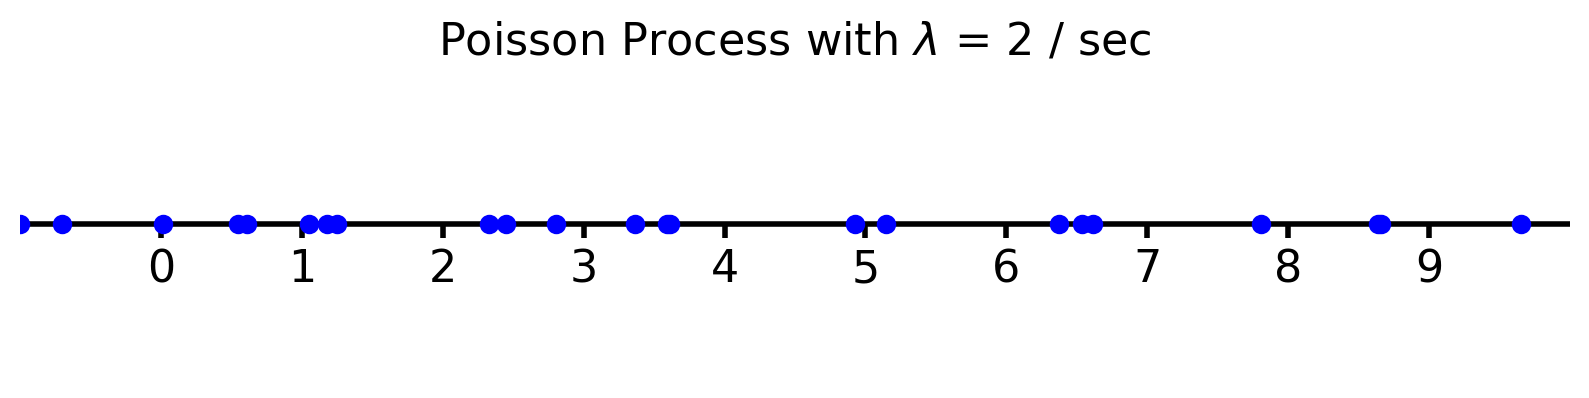

In [3]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(figsize=(10, 2))
#
plt.xlim([-1, 10])
plt.ylim([-1, 1])
#
ax.spines['bottom'].set_position('zero')
#
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)
xmin, xmax = ax.get_xaxis().get_view_interval()
ax.add_artist(Line2D((xmin, xmax), (0, 0), color='black', linewidth=2))
ax.set_xticks([ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.tick_params(axis = 'x', labelsize = 16, length = 5, width = 2)
#
np.random.seed(1)
lam = 2
n_pts = np.random.poisson(lam * 12)
pts = [-1 + 11 * np.random.random() for i in range(n_pts)]
_ = [plt.plot(pt, 0,'bo') for pt in pts]
plt.title(f'Poisson Process with $\lambda$ = {lam} / sec', size = 16);

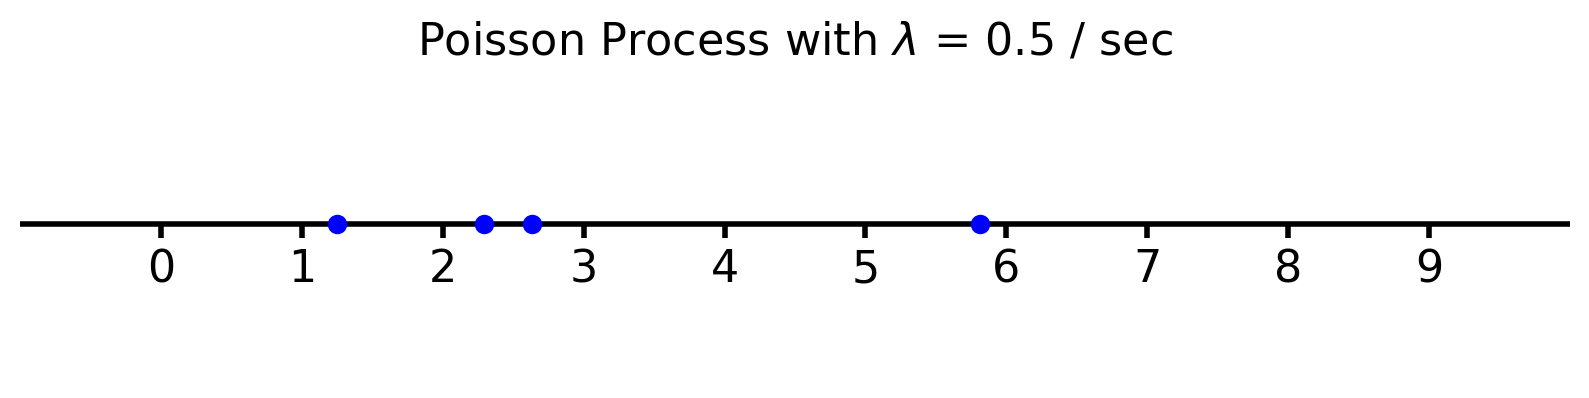

In [4]:
fig, ax = plt.subplots(figsize=(10, 2))
#
plt.xlim([-1, 10])
plt.ylim([-1, 1])
#
ax.spines['bottom'].set_position('zero')
#
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)
xmin, xmax = ax.get_xaxis().get_view_interval()
ax.add_artist(Line2D((xmin, xmax), (0, 0), color='black', linewidth=2))
ax.set_xticks([ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.tick_params(axis = 'x', labelsize = 16, length = 5, width = 2)
#
np.random.seed(2)
lam = 0.5
n_pts = np.random.poisson(lam * 12)
pts = [-1 + 11 * np.random.random() for i in range(n_pts)]
_ = [plt.plot(pt, 0,'bo') for pt in pts]
plt.title(f'Poisson Process with $\lambda$ = {lam} / sec', size = 16);

The Poisson process is a good model for things that occur randomly at some fixed rate:
    
* Emission of radioactive particles
* Locations of rare plants in a forest
* Arrival of phone calls in a phone network
* Errors on a communication link
* And many more

## Two Kinds of Distributions

Thus we have defined two kinds of coin-flipping:
* Bernoulli trials with  probability $p$,
* Poisson process with  rate $\lambda$.

For each of these two cases (discrete and continuous time) there are two questions we can ask:

1. Given that an event has just occured, how many trials or how long until the next
  event?
2. In a fixed number of trials or amount of time, how many events
  occur?


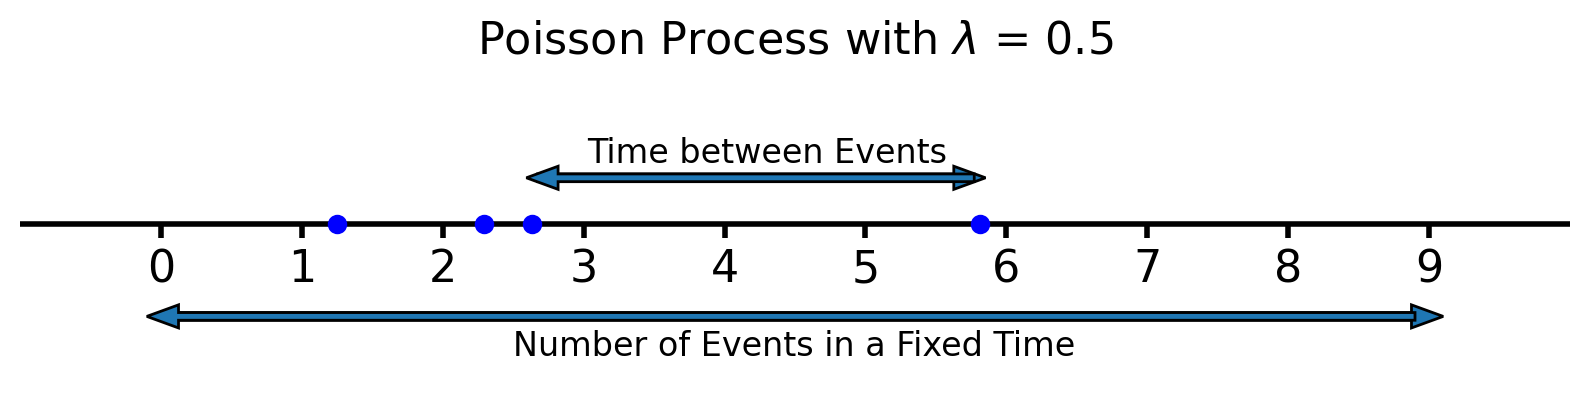

In [5]:
fig, ax = plt.subplots(figsize=(10, 2))
#
plt.xlim([-1, 10])
plt.ylim([-1, 1])
#
ax.spines['bottom'].set_position('zero')
#
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)
xmin, xmax = ax.get_xaxis().get_view_interval()
ax.add_artist(Line2D((xmin, xmax), (0, 0), color='black', linewidth=2))
ax.set_xticks([ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.tick_params(axis = 'x', labelsize = 16, length = 5, width = 2)
#
np.random.seed(2)
lam = 0.5
n_pts = np.random.poisson(lam * 12)
pts = [-1 + 11 * np.random.random() for i in range(n_pts)]
_ = [plt.plot(pt, 0,'bo') for pt in pts]
pts = np.sort(pts)
plt.arrow(pts[2]+0.04, 0.3, pts[3]-pts[2], 0, width = 0.05, length_includes_head = True)
plt.arrow(pts[3]-0.04, 0.3, pts[2]-pts[3], 0, width = 0.05, length_includes_head = True)
plt.text((pts[2]+pts[3])/2 - 1.2, 0.4, 'Time between Events', fontsize = 12)
plt.arrow(0.1, -0.6, 9, 0, width = 0.05, length_includes_head = True)
plt.arrow(8.9, -0.6, -9, 0, width = 0.05, length_includes_head = True)
plt.text(4.5-2, -0.85, 'Number of Events in a Fixed Time', fontsize = 12)
plt.title(f'Poisson Process with $\lambda$ = {lam}', size = 16);

These four cases define four commonly-used random variables.




| |  Time (or Number of Trials) Until Event | Number of Events in Fixed Time (or Number of Trials)  |
|-|:--:|:--:|
|__Bernoulli trials__| Geometric| Binomial |
|__Poisson process__| Exponential | Poisson|

Each one has an associated distribution.

We'll look at each one now.

### The Geometric Distribution

The geometric distribution concerns Bernoulli trials.

It answers the question: "what is the probability it takes $k$ trials to obtain the first success?"

Its PMF is given by:

$$ P[X = k] = p(1-p)^{k-1} \qquad \text{for} \: k \geq 1.$$ 

Its mean is $\mu = \frac{1}{p}$ and its variance is $\sigma^2 = \frac{1-p}{p^2}$.

Its PMF looks like:

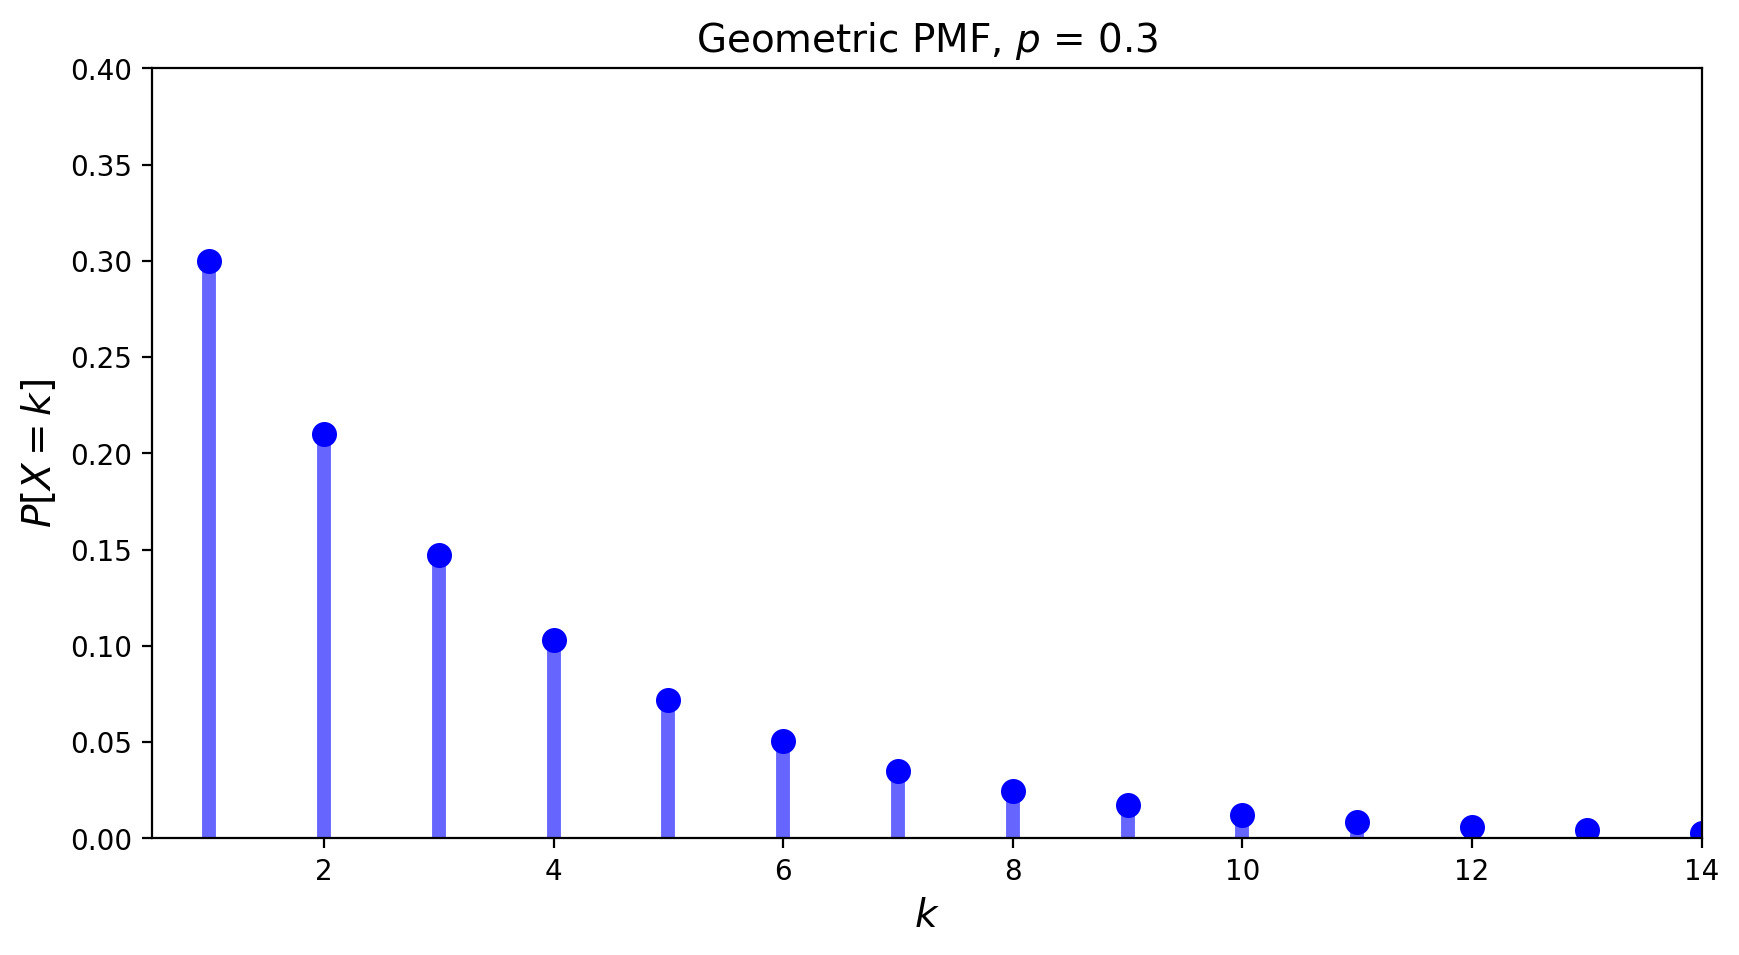

In [6]:
from scipy.stats import geom
p = 0.3
x = np.arange(geom.ppf(0.01, p), geom.ppf(0.995, p))
plt.figure(figsize=(10, 5))
plt.ylim([0, 0.4])
plt.xlim([0.5, max(x)])
plt.plot(x, geom.pmf(x, p), 'bo', ms=8, label = 'geom pmf')
plt.vlines(x, 0, geom.pmf(x, p), colors='b', lw = 5, alpha = 0.6)
plt.title(f'Geometric PMF, $p$ = {p}', size=14)
plt.xlabel(r'$k$', size=14)
plt.ylabel(r'$P[X = k]$', size=14);

### The Binomial Distribution

The Binomial also concerns Bernoulli trials.

In this experiment there are precisely $N$ trials, and $p$ is still
the probability of a success.  

Now we ask: "what is the probability there
will be $k$ successes?"

For any __given__ sequence of $k$ successes and $N-k$ failures, the probability is $p^k \;(1-p)^{N-k}$.

But there are many different such sequences: $\binom{N}{k}$ of them in fact. 

The sequences are mutually exclusive events, so their probabilities add.

So this distribution is $P[X=k] = \binom{N}{k}\; p^k\; (1-p)^{N-k}.$

Its mean is $pN$, and its variance is $p(1-p)N$.  

It's PMF looks like:

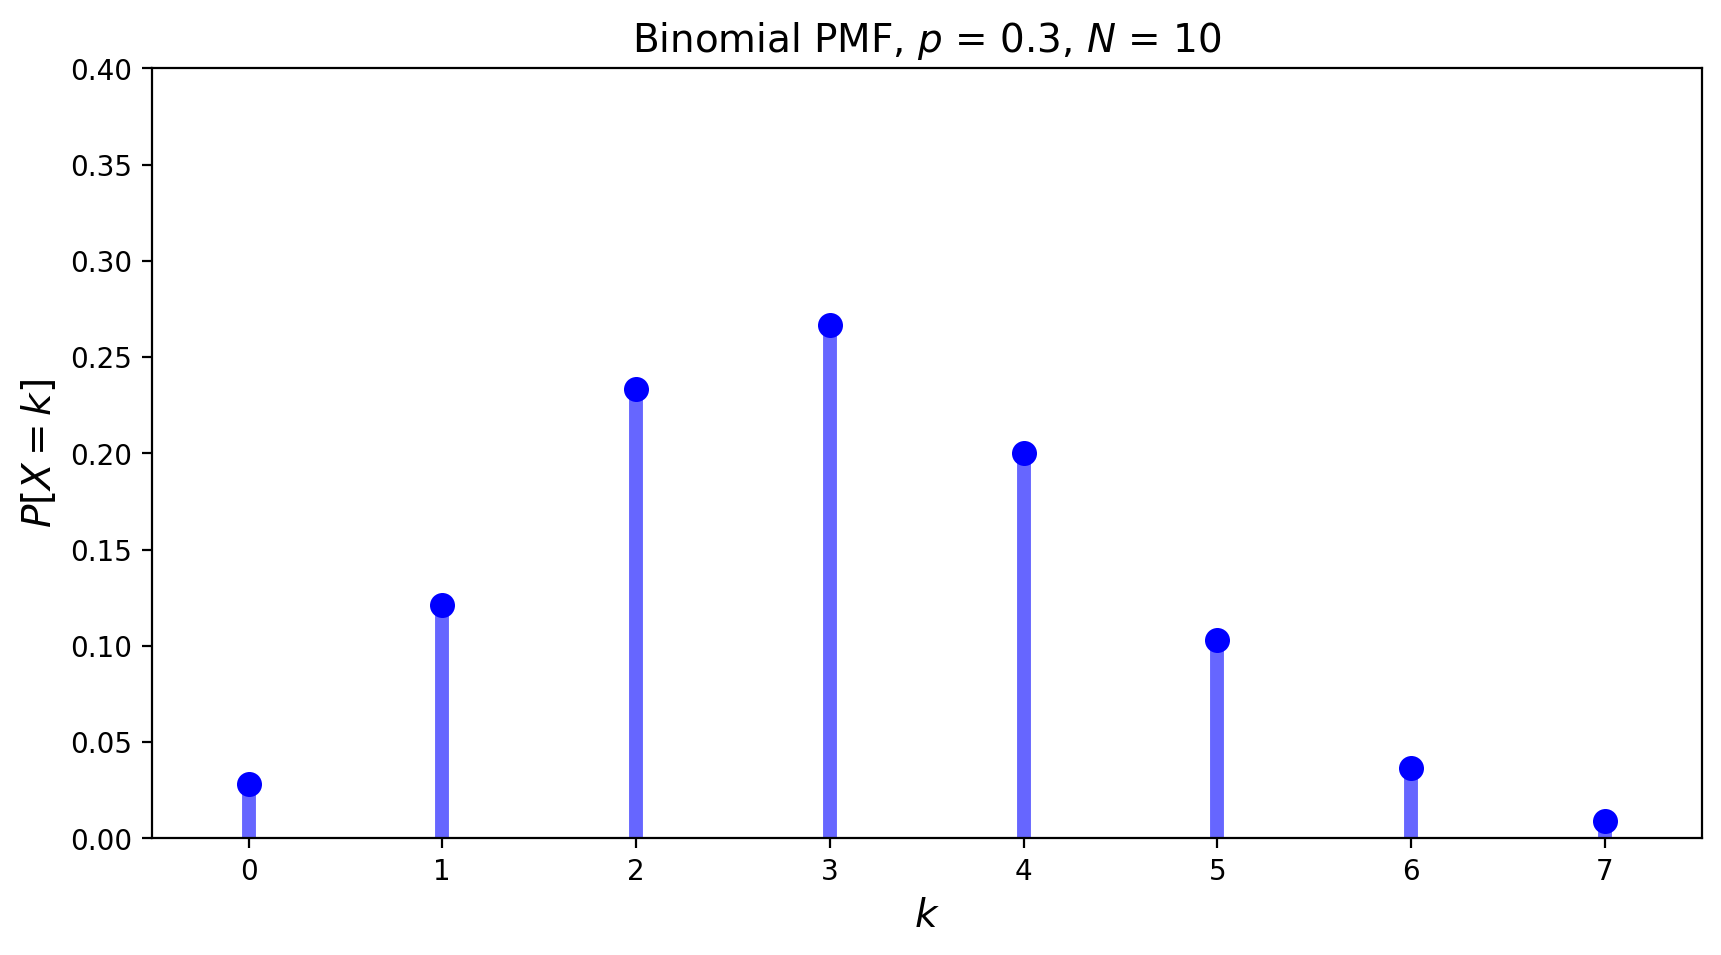

In [7]:
from scipy.stats import binom
p = 0.3
x = np.arange(binom.ppf(0.01, 10, p), binom.ppf(0.9995, 10, p))
plt.figure(figsize=(10, 5))
plt.ylim([0, 0.4])
plt.xlim([-0.5, max(x)+0.5])
plt.plot(x, binom.pmf(x, 10, p), 'bo', ms=8, label = 'binom pmf')
plt.vlines(x, 0, binom.pmf(x, 10, p), colors='b', lw = 5, alpha=0.6)
plt.title(f'Binomial PMF, $p$ = {p}, $N$ = 10', size=14)
plt.xlabel(r'$k$', size=14)
plt.ylabel(r'$P[X = k]$', size=14);

### The Exponential Distribution

Now we shift to a situation where successes occur at a fixed __rate.__

That is, we are considering a Poisson process.

The Exponential random variable is the analog of the geometric in the continuous case,
_i.e.,_ the situation in which a success happens at some rate
$\lambda$.  

This RV can be thought of as measuring the __time__ until a success occurs. 

Its PDF is:

$$ f(x) = \lambda e^{- \lambda x}.$$

The mean is $1/\lambda$, and the variance is $1/\lambda^2$.

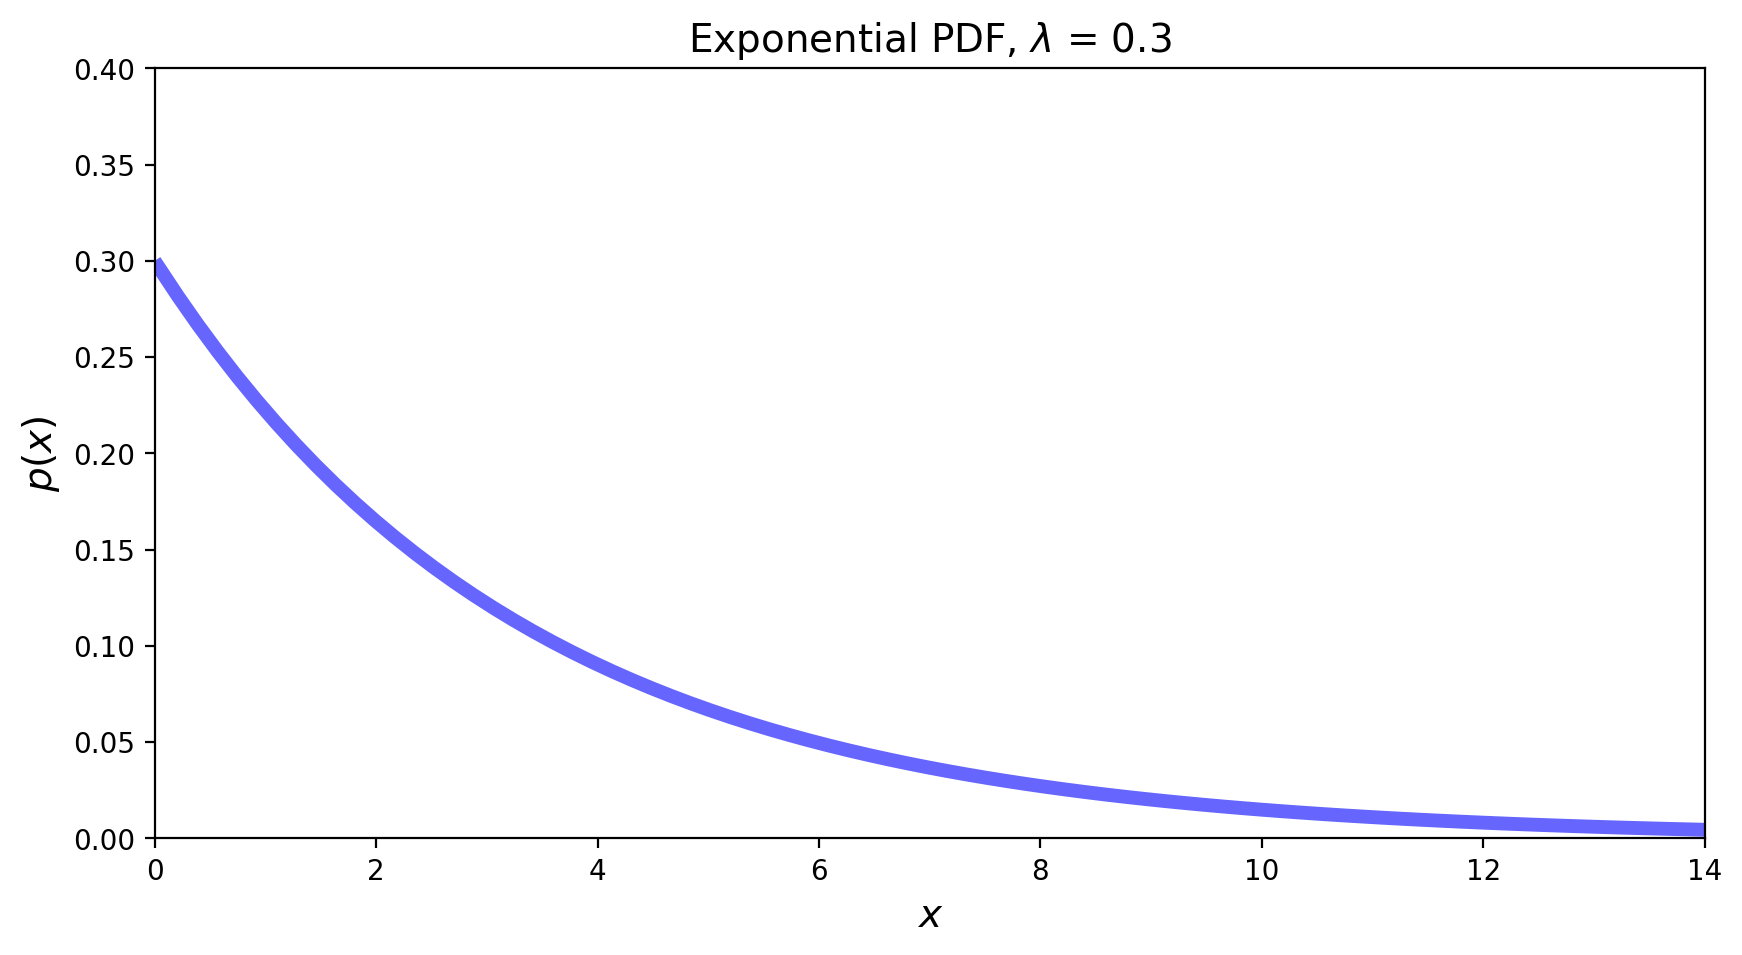

In [8]:
from scipy.stats import expon
p = 0.3
x = np.linspace(expon.ppf(0.01, scale=1/p), expon.ppf(0.995, scale=1/p), 100)
plt.figure(figsize=(10, 5))
plt.plot(x, expon.pdf(x, scale=1/p),'b-', lw = 5, alpha = 0.6, label='expon pdf')
plt.title(f'Exponential PDF, $\lambda$ = {p}', size=14)
plt.xlabel(r'$x$', size=14)
plt.ylabel(r'$p(x)$', size=14)
plt.ylim([0, 0.4])
plt.xlim([0, 14]);

By integration we can find the CDF of the exponential:
    
$$ F(x) = \int_0^x \lambda e^{-\lambda s} ds = 1 - e^{-\lambda x}. $$

Notice how the Exponential is the __continuous analog__ of the Geometric:

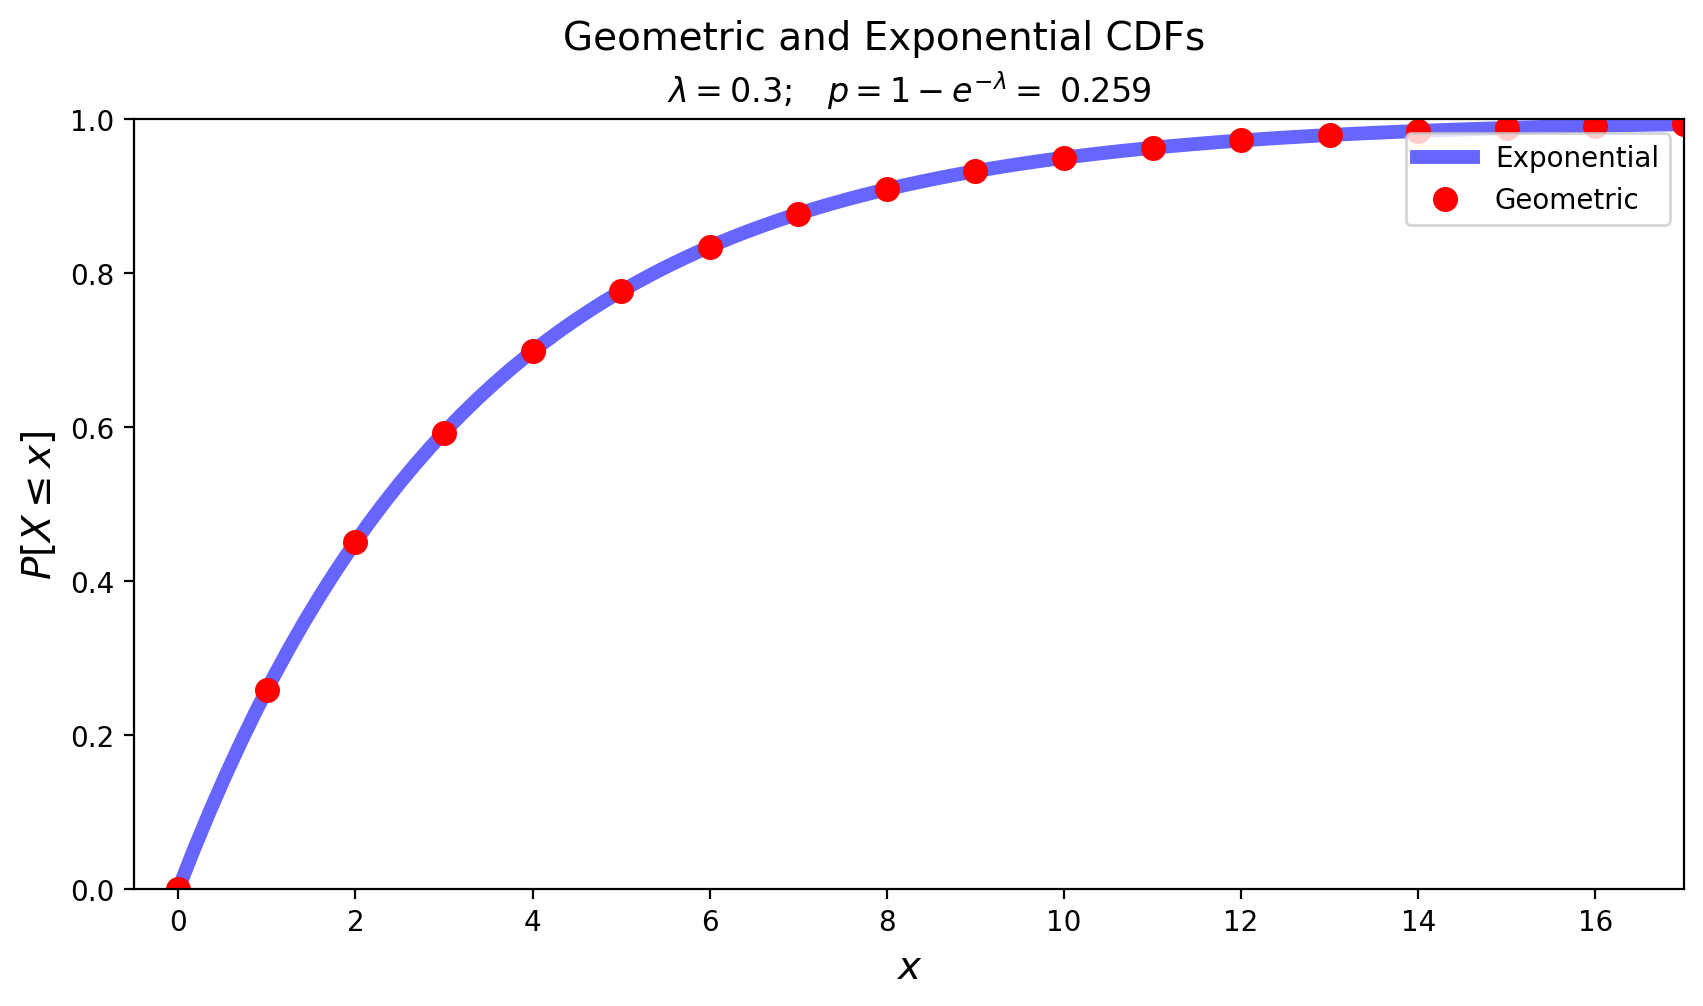

In [9]:
from math import exp 
lam = 0.3
p = 1 - exp(- lam)
x = np.linspace(expon.ppf(0, scale=1/lam), expon.ppf(0.995, scale=1/lam), 100)
plt.figure(figsize=(10, 5))
plt.plot(x, expon.cdf(x, scale=1/lam),'b-', lw = 5, alpha = 0.6, label='Exponential')
xg = np.arange(geom.ppf(0, p), geom.ppf(0.995, p))
plt.ylim([0, 1])
plt.xlim([-0.5, max(xg)])
plt.plot(xg, geom.cdf(xg, p), 'ro', ms = 8, label = 'Geometric')
plt.suptitle(f'Geometric and Exponential CDFs', size = 14)
plt.title(r'$\lambda = 0.3; \;\;\; p = 1-e^{-\lambda} =$' + f' {p:0.3f}', size=12)
plt.xlabel(r'$x$', size=14)
plt.ylabel(r'$P[X \leq x]$', size = 14)
plt.legend(loc = 'best');

### The Poisson Distribution

When we ask the question 

"How many successes occur in a fixed amount of time?", 

...we get the Poisson distribution.

The Poisson distribution is the limiting form of binomial, when the
number of trials goes to infinity, happening at some rate $\lambda$.

$$ P[k \text{ successes in time } T] = (\lambda T)^k \frac{e^{- \lambda T}}{k!}$$

It answers the question: when events happen indepdently at some fixed rate, how many will occur in a given fixed interval?

Its mean is $\lambda T$ and its variance is $\lambda T$ as well.

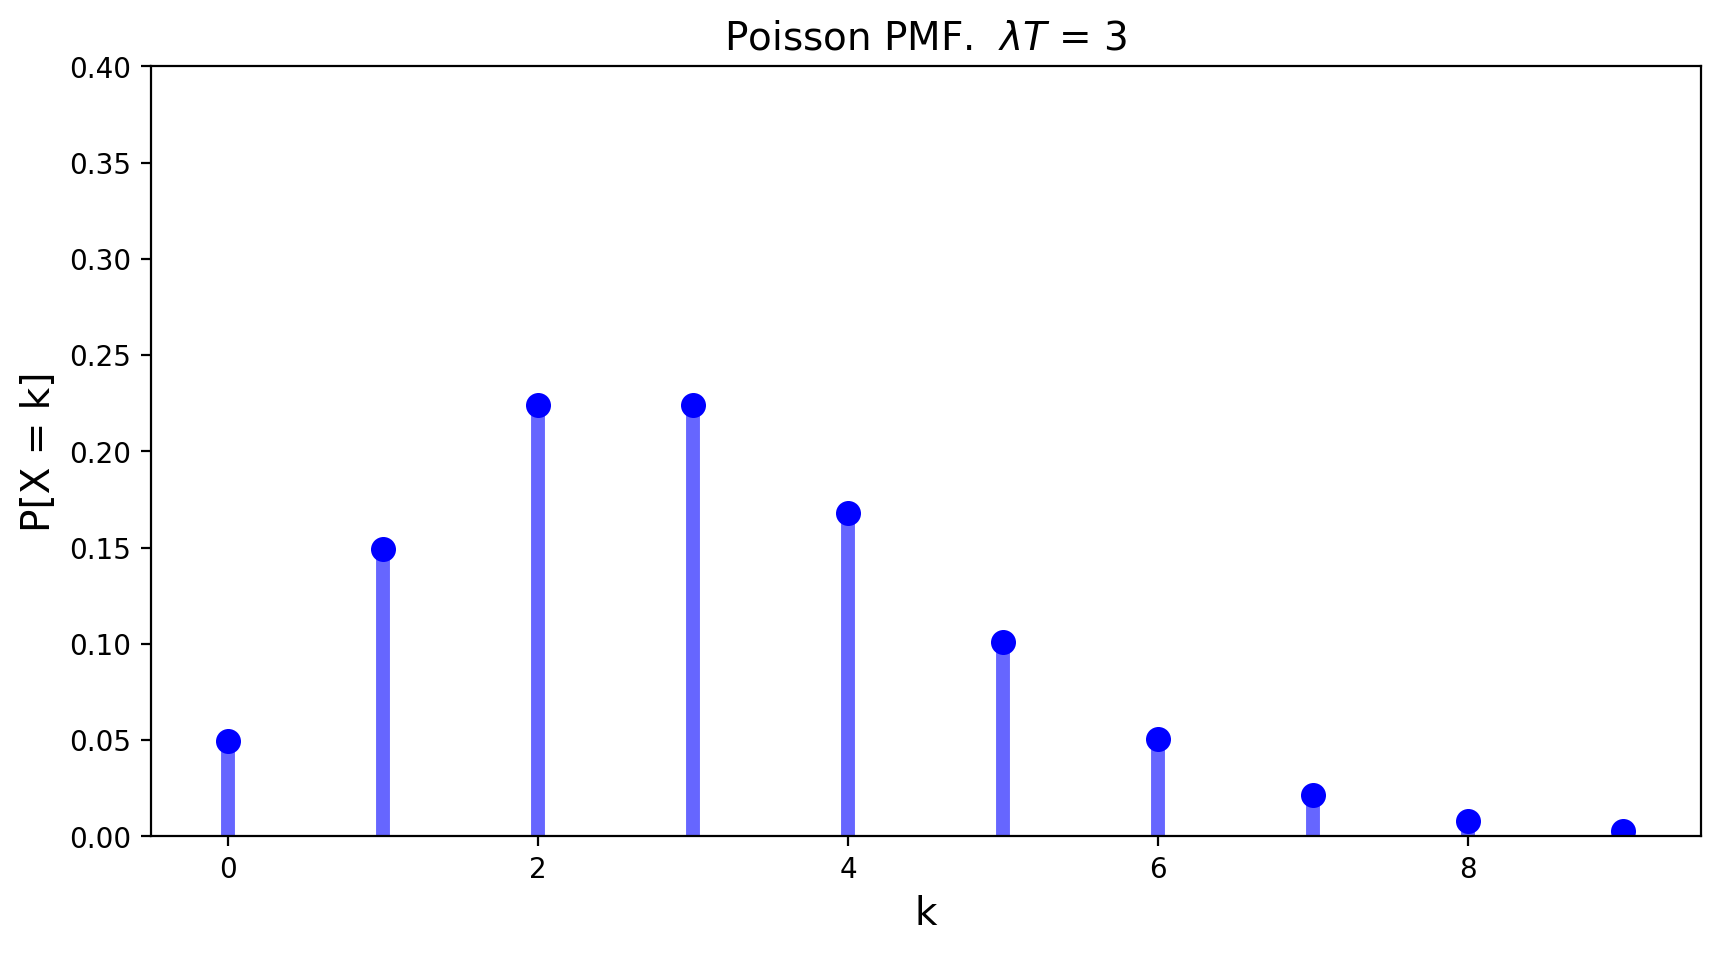

In [10]:
from scipy.stats import poisson
mu = 3
x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.9995, mu))
# plt.ylim([0,1])
plt.figure(figsize=(10, 5))
plt.xlim([-0.5, max(x)+0.5])
plt.ylim(ymax = 0.4)
plt.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
plt.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.6)
plt.title(f'Poisson PMF.  $\lambda T$ = {mu}', size=14)
plt.xlabel(r'k', size=14)
plt.ylabel(r'P[X = k]', size=14);

The Poisson distribution has an interesting role in our perception of randomness (which you can read more about [here](http://www.empiricalzeal.com/2012/12/21/what-does-randomness-look-like/#more-2450)).    

The classic example comes from history.  From the above site:

>In 1898 Ladislaus Bortkiewicz, a Russian statistician of Polish descent, was trying to understand why, in some years, 
>an unusually large number of soldiers in the Prussian army were dying due to horse-kicks. In a single army corp, 
>there were sometimes 4 such deaths in a single year. Was this just coincidence?

To assess whether horse-kicks were random (not following any pattern) Bortkiewicz simply compared the number per year to what would be predicted by the Poisson distribution.

In [11]:
# note that this data is available in 'data/HorseKicks.txt'
horse_kicks = pd.DataFrame(
data = np.array([
[0, 108.67, 109],
[1, 66.29, 65],
[2, 20.22, 22],
[3, 4.11, 3],
[4, 0.63, 1],
[5, 0.08, 0],
[6, 0.01, 0]]),
columns = ["Number of Deaths Per Year","Predicted Instances (Poisson)","Observed Instances"])
horse_kicks

,Number of Deaths Per Year,Predicted Instances (Poisson),Observed Instances
0,0.0,108.67,109.0
1,1.0,66.29,65.0
2,2.0,20.22,22.0
3,3.0,4.11,3.0
4,4.0,0.63,1.0
5,5.0,0.08,0.0
6,6.0,0.01,0.0


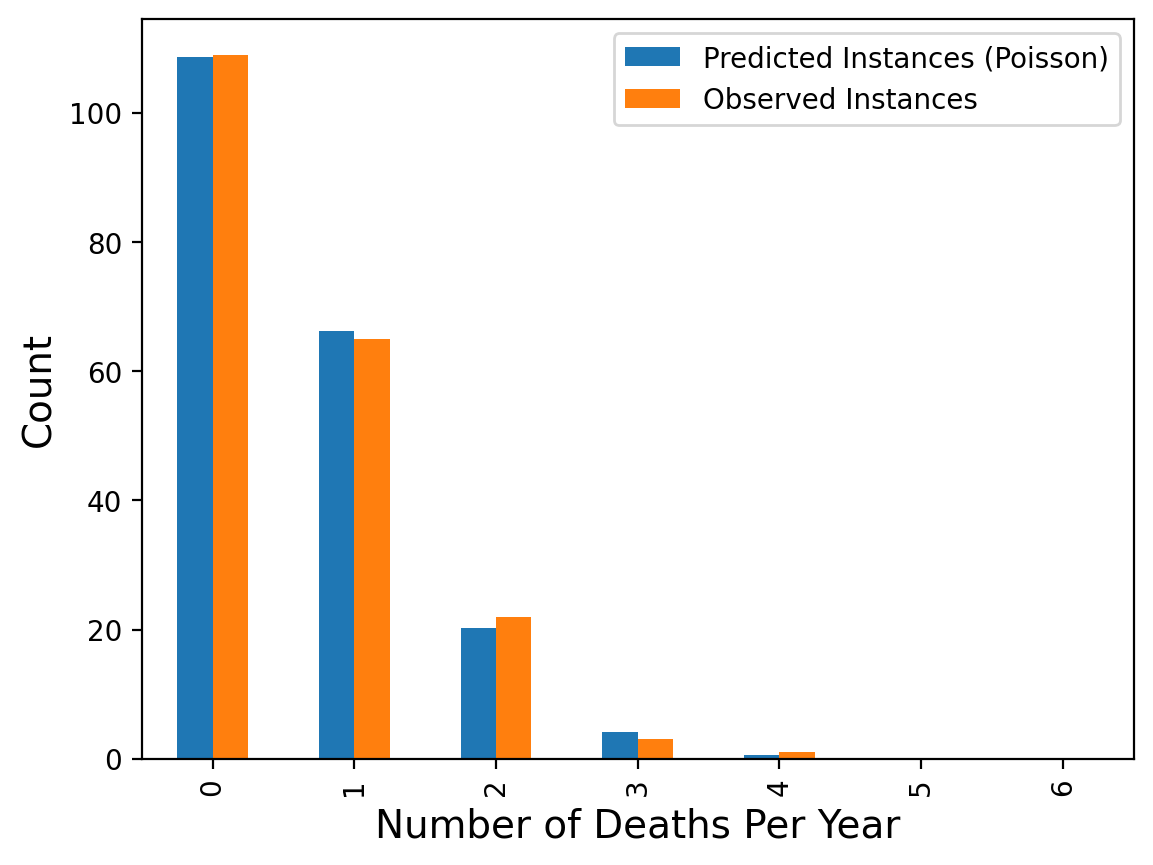

In [12]:
horse_kicks[["Predicted Instances (Poisson)","Observed Instances"]].plot.bar()
plt.xlabel("Number of Deaths Per Year", size=14)
plt.ylabel("Count", size=14);

The message here is that when events occur at random, we actually tend to __perceive them as clustered.__  

````{margin}
```{note}
This image is from Steven Pinker’s book, _The Better Angels of our Nature._
```
````

Here is another example:

<center>
    
<img src="images/pinker-glow-worms-and-stars-plot.jpg" width="450px">
    
</center>

Which of these was generated by a random process ocurring equally likely everywhere?

In the left figure, the number of dots falling into regions of a given size follows the Poisson distribution.

In the right figure, the dots are too evenly dispersed to be random.

Note: From the four distributions considered so far only the exponential distribution describes a __continuous random variable__.

### The Uniform Distribution



The uniform distribution models the case in which all outcomes are equally probable.  

It can be a discrete or continuous distribution.

We have already seen the uniform distribution in the case of rolls of a fair die:

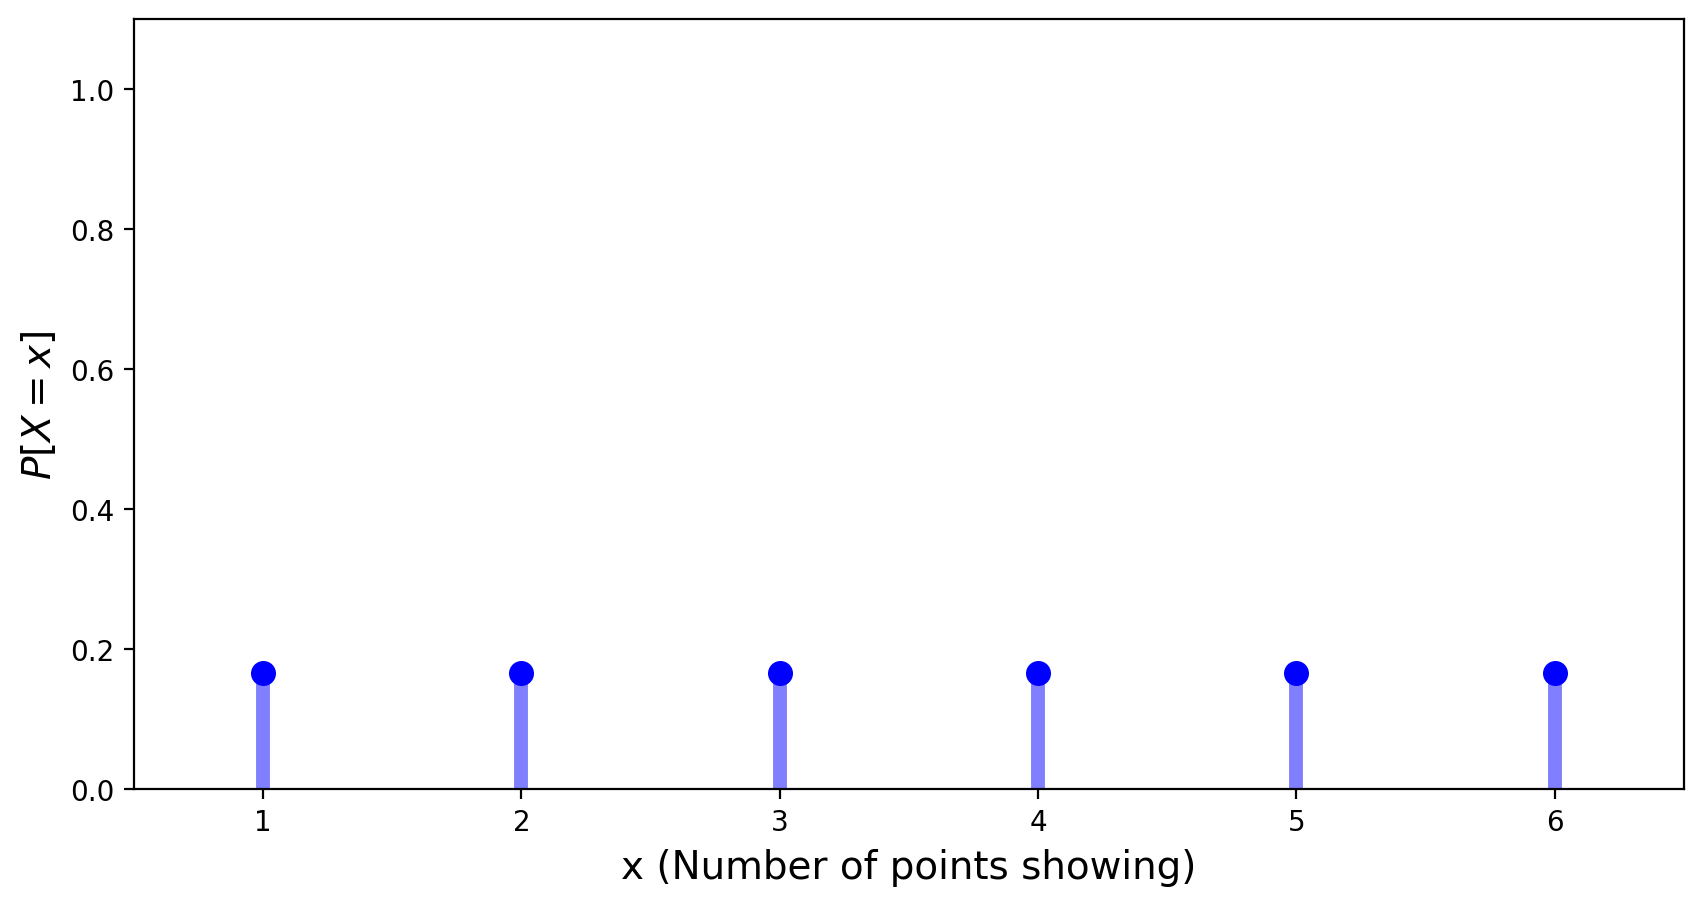

In [13]:
x = np.arange(1, 7)
plt.figure(figsize=(10, 5))
plt.plot(x, 6*[1/6.], 'bo', ms=8)
plt.vlines(x, 0, 1/6., colors='b', lw=5, alpha=0.5)
plt.xlim([0.5, 6.5])
plt.ylim([0, 1.1])
plt.xlabel(r'x (Number of points showing)', size=14)
plt.ylabel(r'$P[X = x]$', size=14);

There is an important relationship between the uniform and Poisson distributions.

__When the time an event occurs is uniformly distributed, the number of events in a time interval is Poisson distributed.__

You can replace "time" with "location", and so on.

<!-- Also, the reverse statment is true as well. -->

So a simple way to generate a picture like the scattered points above is to select the $x$ and $y$ coordinates of each point uniformly distributed over the picture size.

A discrete uniform distribution on interval $[a,b]$ has the PMF equal to $\frac{1}{n}$ with $n = b-a+1.$ 

Its expected value is equal to $\frac{a+b}{2}$ and its variance is given by $\frac{n^2 - 1}{12}.$

The continuous uniform distribution will be discussed in detail in the next chapter.

### The Gaussian Distribution

<center>

<img src="images/Gauss-on-Deutschemark.png" width="600px">

</center>

The Gaussian Distribution is also called the Normal Distribution.

We will make __extensive__ use of Gaussian distribution!

One of reasons we will use it so much is that it is a good guess for how errors are distributed in data.

This comes from the celebrated __Central Limit Theorem__.   Informally, 

>_The sum of a large number of independent observations from any
>distribution with finite variance tends to have a Gaussian
> distribution._

<center>

<img src="images/Galton-Bean-Machine.png" width="350px">
       
</center>

<center>
    Francis Galton's "Bean Machine"
</center>

One way of thinking of the Gaussian is that it is the
limit of the Binomial when $N$ is large, that is, the limit of
the sum of many Bernoulli trials.    

However many other
sums of random variables (not just Bernoulli trials) converge to the
Gaussian as well.

The _standard Gaussian_ distribution has mean zero and a variance (and standard deviation)
of 1.   The PDF of the standard Gaussian is:

$$ f(x) = \frac{1}{\sqrt{2 \pi}} e^{-x^2/2}. $$

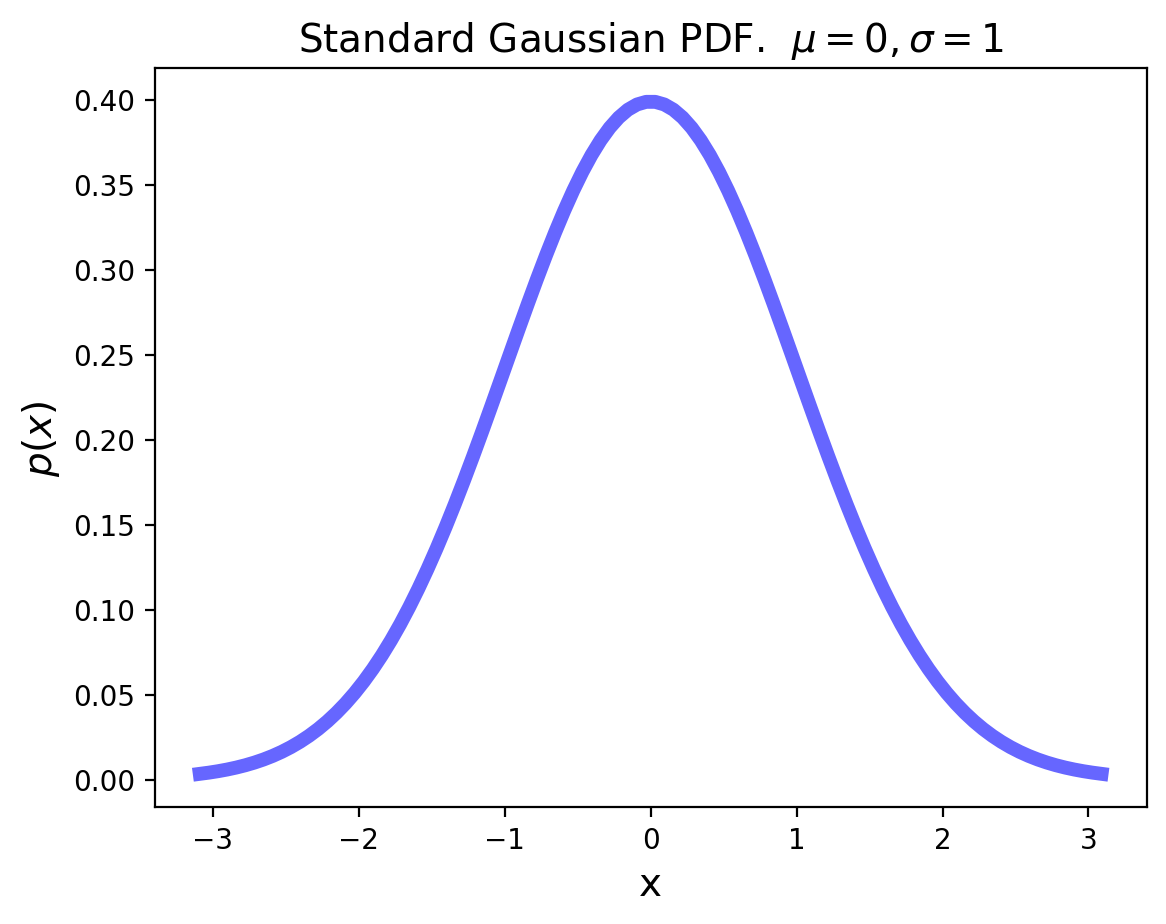

In [14]:
from scipy.stats import norm
plt.figure()
x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 100)
plt.plot(x, norm.pdf(x),'b-', lw = 5, alpha = 0.6)
plt.title(r'Standard Gaussian PDF.  $\mu = 0, \sigma = 1$', size=14)
plt.xlabel('x', size=14)
plt.ylabel(r'$p(x)$', size=14);

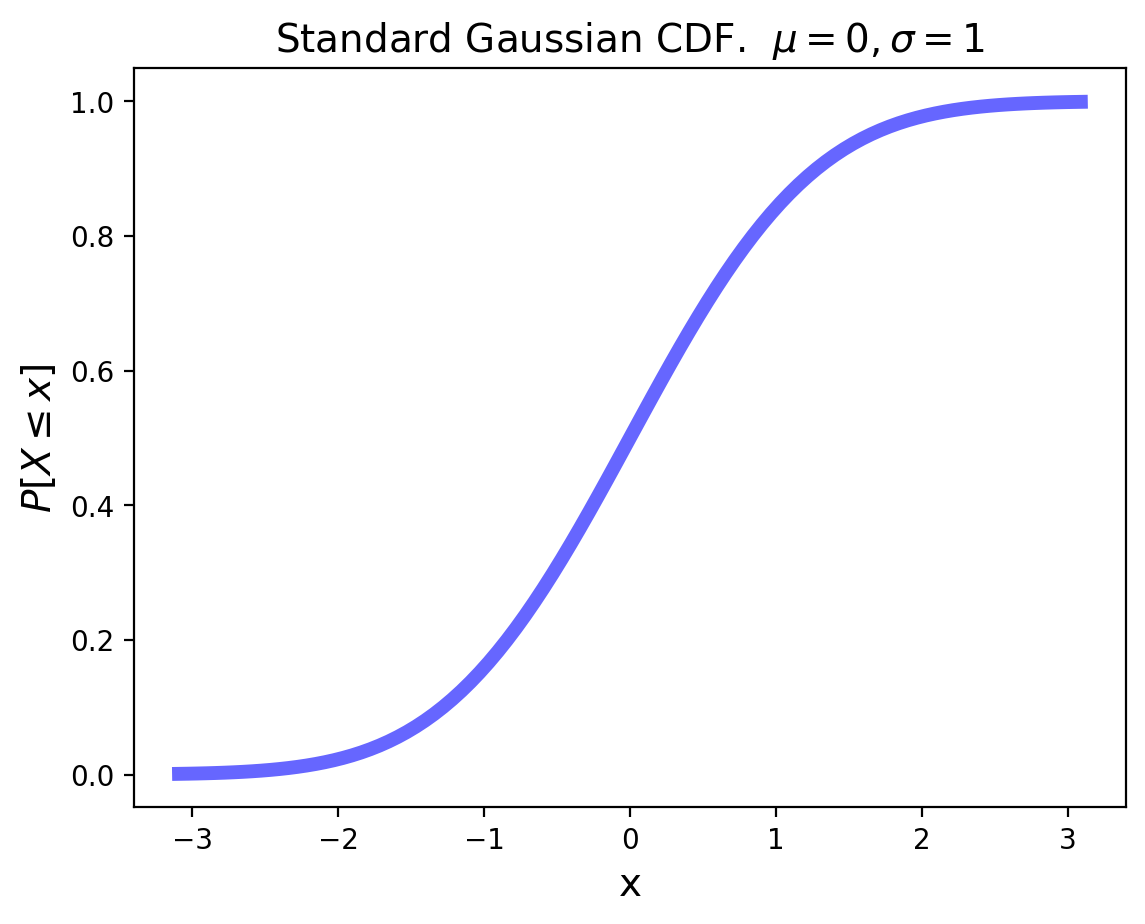

In [15]:
plt.figure()
x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 100)
plt.plot(x, norm.cdf(x),'b-', lw = 5, alpha = 0.6)
plt.title(r'Standard Gaussian CDF.  $\mu = 0, \sigma = 1$', size=14)
plt.xlabel('x', size=14)
plt.ylabel(r'$P[X\leq x]$', size=14);

For an arbitrary Gaussian distribution with mean $\mu$ and variance
$\sigma^2$, the PDF is simply the standard Gaussian that is relocated to
have its center at $\mu$ and its width scaled by $\sigma$:

$$ f_{\mu,\sigma}(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}. $$

As a special case, the sum of $n$ independent Gaussian variables is Gaussian.


Thus Gaussian processes remain Gaussian after passing through linear
systems.   

If $X_1$ and $X_2$ are Gaussian, then $X_3 = aX_1 + bX_2$ is Gaussian.

### Empirical CDFs

What about when you're working with observed data?

You can still think about the "empirical" CDF that results from your observations:

Fundementally, all it takes is sorting your numbers and counting the fraction less than each number!

In [16]:
#defining a function for calculating the CDF
def cdf(data):
    p = 1. * np.arange(1,len(data)+1) / (len(data))
    return p

In [17]:
values = [5, 6, 2, 1, 0, 0.5, 2, 3, 3, 4, 4, 1]
values_cdf = cdf(values)

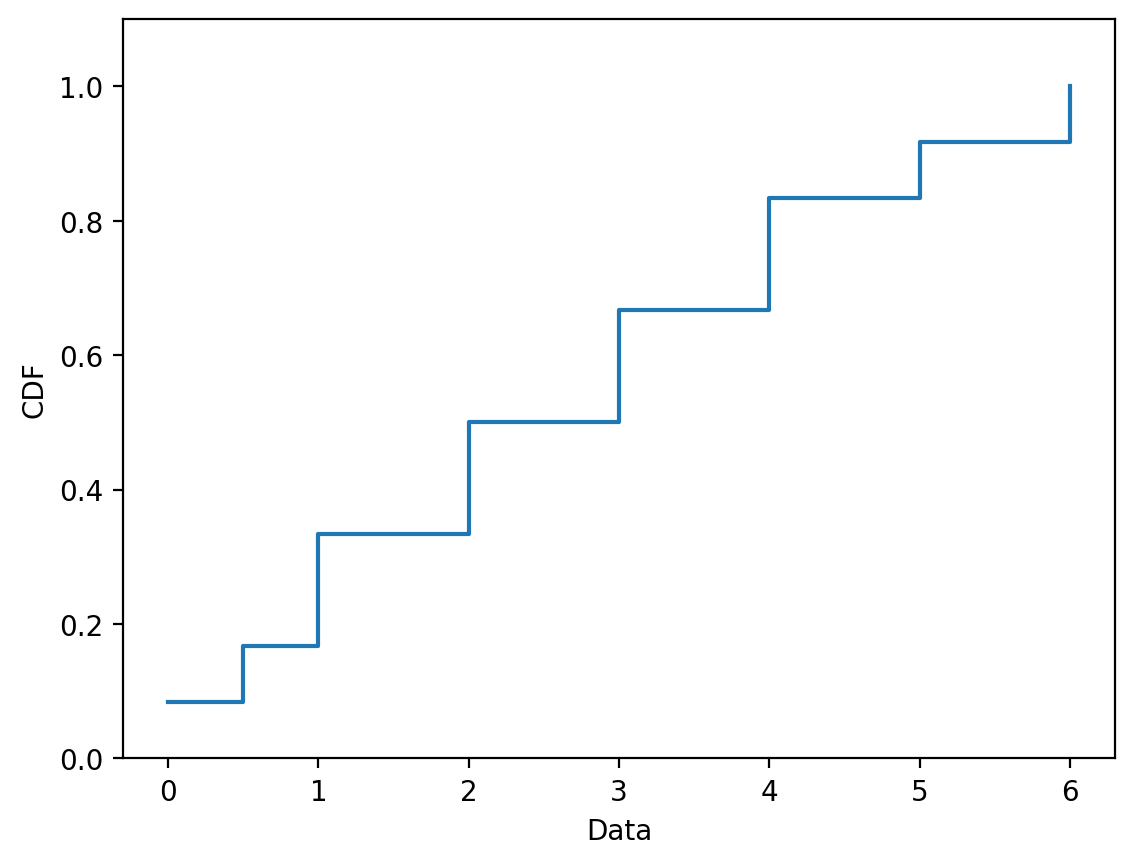

In [18]:
#plotting the CDF
plt.step(np.sort(values), values_cdf, where="post")
plt.xlabel('Data')
plt.ylabel('CDF')
plt.ylim(0,1.1)
plt.show()